# Create Intermediate Raster Result

### *TODO: Run again, once https://trello.com/c/FYeCQcSg/1494-saveasdataset-handler-erlaubt-kein-in-display-name is fixed*

In [1]:
from datetime import datetime
import geoengine as ge
from geoengine import StoredDataset
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             5be70e6f-78f7-4fdd-847b-53d9f78173bd
Session Id:          092928e1-ab52-41b8-8102-864d560e5320
Session valid until: 2023-12-14T14:21:52.890Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": "ndvi"
        }
    }
})
workflow

0abf52bc-e7da-557b-be43-59b96b591f4a

## Query raster via WMS

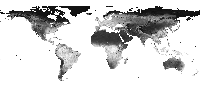

In [5]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

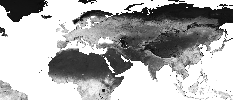

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

## Store part of the world as new dataset

In [9]:
task = workflow.save_as_dataset(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(
            datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z"),
            datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ).as_raster_query_rectangle_api_dict(),
    "part_ndvi"
    "Part NDVI",
    "Test Description",
)
task

UUID('fcd3ba8c-bbff-4cf4-af0d-ecb68b52a712')

In [10]:
task_status_info = task.wait_for_finish(1)
task_status_info

TaskStatusInfo(status='failed', time_started=None, error='InvalidDatasetIdNamespace', clean_up={'status': 'completed', 'info': None})

In [ ]:
stored_dataset = StoredDataset.from_response(task_status_info.info)
stored_dataset

In [ ]:
new_workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": str(stored_dataset.dataset_name)
        }
    }
})
new_workflow

## WMS request from new dataset

In [ ]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

In [ ]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

In [ ]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

In [ ]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

In [ ]:
time = datetime.strptime(
    '2014-05-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

## Show layer for new dataset

In [ ]:
root_collection = ge.layer_collection()
all_datasets_collection = next(filter(lambda item: item.name == 'Datasets', root_collection.items)).load()
all_part_ndvi_layers = list(filter(lambda item: item.name == 'Part NDVI', all_datasets_collection.items))
for layer in all_part_ndvi_layers:
    display(layer)

## Save layer as a new dataset

In [ ]:
ge.initialize("http://localhost:3030/api")

In [ ]:
session = ge.get_session()
session

In [ ]:
layer = all_part_ndvi_layers[0].load()
layer_task = layer.save_as_dataset()
layer_task

In [ ]:
layer_task_status_info = layer_task.wait_for_finish(1)
layer_task_status_info

In [ ]:
stored_layer_dataset = StoredDataset.from_response(layer_task_status_info.info)
stored_layer_dataset

In [ ]:
root_collection = ge.layer_collection()
all_datasets_collection = next(filter(lambda item: item.name == 'Datasets', root_collection.items)).load()
all_part_ndvi_layers = list(filter(lambda item: item.name == 'Part NDVI', all_datasets_collection.items))
for layer in all_part_ndvi_layers:
    display(layer)